In [1]:
import matplotlib.pyplot as plt

In [2]:
from sentinelhub import SHConfig
import cv2

config = SHConfig()


# config.instance_id = '4e21e441-02f8-4d69-b074-1f2aef91b6df'
# config.sh_client_id = 'cd1be250-6d56-43ad-a8ac-cc28ed1b4ad2'
# config.sh_client_secret = 'cP/E2!2/UQhE5.Qm/[Ofr:7e(,Lori*uw12wVy2@'


if not config.sh_client_id or not config.sh_client_secret:
    print("Warning! To use Process API, please provide the credentials (OAuth client ID and client secret).")
else:
    print("ALl goog")

from sentinelhub import (
    CRS,
    BBox,
    DataCollection,
    DownloadRequest,
    MimeType,
    MosaickingOrder,
    SentinelHubDownloadClient,
    SentinelHubRequest,
    bbox_to_dimensions,
)


vilassar_coords_wgs84 = [
    2.296615,41.470773,2.333479,41.482219
]

ALl goog


/Users/bernat/.virtualenvs/esparver/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
resolution = 10
betsiboka_bbox = BBox(bbox=vilassar_coords_wgs84, crs=CRS.WGS84)
betsiboka_size = bbox_to_dimensions(betsiboka_bbox, resolution=resolution)

print(f"Image shape at {resolution} m resolution: {betsiboka_size} pixels")

Image shape at 10 m resolution: (309, 125) pixels


In [142]:
land_mask_script = """
//VERSION=3

function setup() {
  return {
    input: [{
      bands: ["B03", "B08"], // this sets which bands to use
    }],
    output: {
      bands: 2,
      sampleType: "UINT16" // raster format will be UINT8
    }
  };
}
function evaluatePixel(sample) {
  return [sample.B03 * 2**16, sample.B08 * 2**16]; // bands need to be multiplied by 255
}
"""

In [143]:
request_landmask = SentinelHubRequest(
    evalscript=land_mask_script,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=DataCollection.SENTINEL2_L2A,
            time_interval=("2022-10-10", "2022-10-14"),
            mosaicking_order=MosaickingOrder.LEAST_CC,
        )
    ],
    responses=[SentinelHubRequest.output_response("default", MimeType.TIFF)],
    bbox=betsiboka_bbox,
    size=betsiboka_size,
    config=config,
)

all_bands_response = request_landmask.get_data()
print(all_bands_response[0].shape)

(125, 309, 2)


In [147]:
img = all_bands_response[0]

In [148]:
res = (img[..., 0] - img[..., 1]) / (img[..., 0] + img[..., 1])

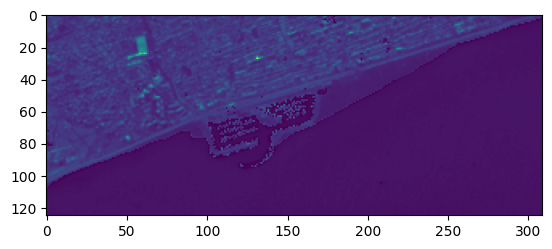

In [149]:
# cv2.imwrite("test.tiff", all_bands_response[0])
plt.imshow(res)

In [96]:
img2022 = all_bands_response[0]

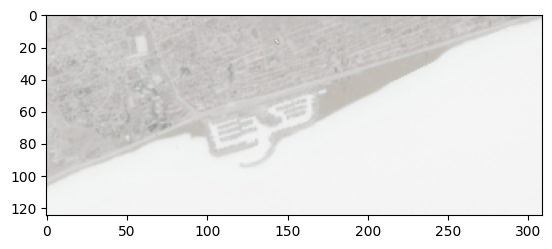

In [107]:
plt.imshow(img2019)

In [129]:
img2019B = ((img2019[..., -1] / 255) > 0.07).astype(np.uint8)
img2022B = ((img2022[..., -1] / 255) > 0.07).astype(np.uint8)

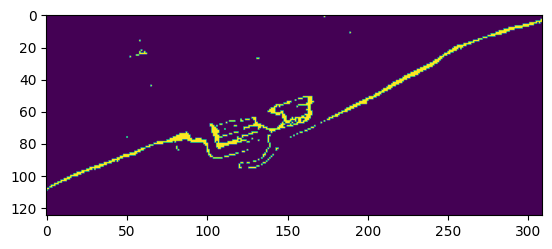

In [133]:
plt.imshow(img2022B - img2019B)

In [131]:
np.amin(((img2019[..., -1] / 255)> 0.05))

False

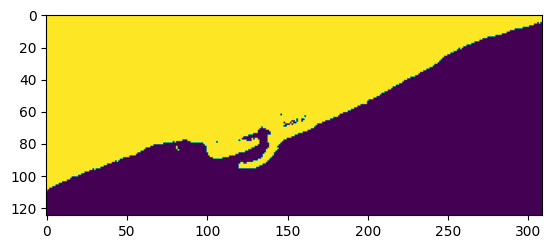

In [132]:
plt.imshow(img2019B)

In [ ]:
diff = img2019[..., 

In [90]:
all_bands_response[0].shape

(125, 309, 4)

In [78]:
import numpy as np

In [79]:
np.amax(all_bands_response)

255

In [80]:
all_bands_response[0][...,-1]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [81]:
img2 = (all_bands_response[0][...,-1] / 255) > 0.05

In [82]:
img = (all_bands_response[0][...,-1] / 255) > 0.05

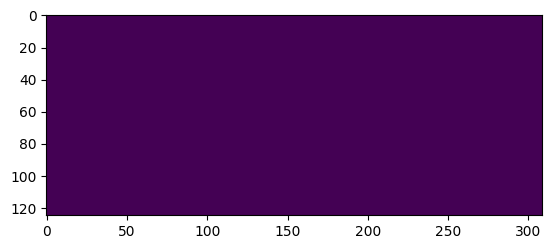

In [83]:
plt.imshow((all_bands_response[0][...,-1] / 255) > 0.05)

In [84]:
from scipy import ndimage, misc

import matplotlib.pyplot as plt

In [85]:
img = all_bands_response[0][...,-1]

In [92]:
img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

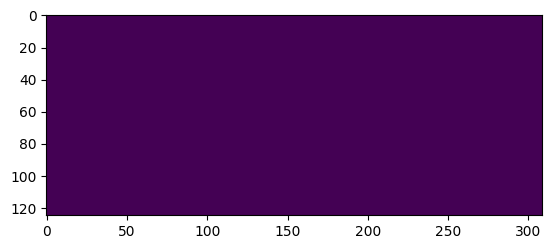

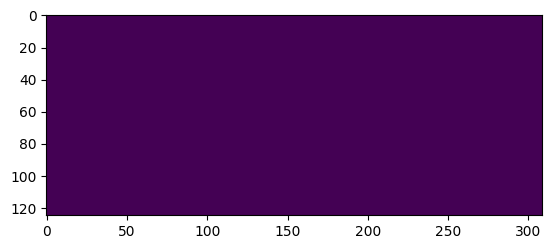

In [86]:
fig = plt.figure()


result = ndimage.sobel(img)

plt.imshow(img)

plt.show()

plt.imshow(result)

plt.show()

In [ ]:
n

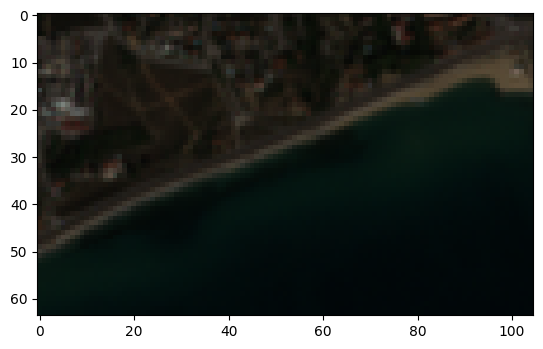

In [47]:
plt.imshow(all_bands_response[0][...,0:3])

In [5]:
ndwi_script = """
//VERSION=3
//ndwi


var colorRamp1 = [
  	[0, 0xFFFFFF],
  	[1, 0x008000]
  ];
var colorRamp2 = [
  	[0, 0xFFFFFF],
  	[1, 0x0000CC]
  ];

let viz1 = new ColorRampVisualizer(colorRamp1);
let viz2 = new ColorRampVisualizer(colorRamp2);

function setup() {
  return {
    input: ["B03", "B08", "SCL","dataMask"],
    output: [
		{ id:"default", bands: 4 },
        { id: "index", bands: 1, sampleType: "FLOAT32" },
        { id: "eobrowserStats", bands: 2, sampleType: 'FLOAT32' },
        { id: "dataMask", bands: 1 }
	]
  };
}

function evaluatePixel(samples) {
  let val = index(samples.B03, samples.B08);
  let imgVals = null;
  // The library for tiffs works well only if there is only one channel returned.
  // So we encode the "no data" as NaN here and ignore NaNs on frontend.
  const indexVal = samples.dataMask === 1 ? val : NaN;
  
  if (val < -0) {
    imgVals = [...viz1.process(-val), samples.dataMask];
  } else {
    imgVals = [...viz2.process(Math.sqrt(Math.sqrt(val))), samples.dataMask];
  }
  return {
    default: imgVals,
    index: [indexVal],
    eobrowserStats:[val,isCloud(samples.SCL)?1:0],
    dataMask: [samples.dataMask]
  };
}


function isCloud(scl) {
  if (scl == 3) {
    // SC_CLOUD_SHADOW
    return false;
  } else if (scl == 9) {
    // SC_CLOUD_HIGH_PROBA
    return true;
  } else if (scl == 8) {
    // SC_CLOUD_MEDIUM_PROBA
    return true;
  } else if (scl == 7) {
    // SC_CLOUD_LOW_PROBA
    return false;
  } else if (scl == 10) {
    // SC_THIN_CIRRUS
    return true;
  } else if (scl == 11) {
    // SC_SNOW_ICE
    return false;
  } else if (scl == 1) {
    // SC_SATURATED_DEFECTIVE
    return false;
  } else if (scl == 2) {
    // SC_DARK_FEATURE_SHADOW
    return false;
  }
  return false;
}
"""

request_ndwi = SentinelHubRequest(
    evalscript=ndwi_script,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=DataCollection.SENTINEL2_L2A,
            time_interval=("2022-10-10", "2022-10-14"),
            mosaicking_order=MosaickingOrder.LEAST_CC,
        )
    ],
    responses=[SentinelHubRequest.output_response("default", MimeType.TIFF)],
    bbox=betsiboka_bbox,
    size=betsiboka_size,
    config=config,
)

all_bands_response = request_ndwi.get_data()
print(all_bands_response[0].shape)
cv2.imwrite("test.tiff", all_bands_response[0])

(125, 309, 4)


True

In [6]:
all_bands_response[0].shape

(125, 309, 4)

In [7]:
import matplotlib.pyplot as plt

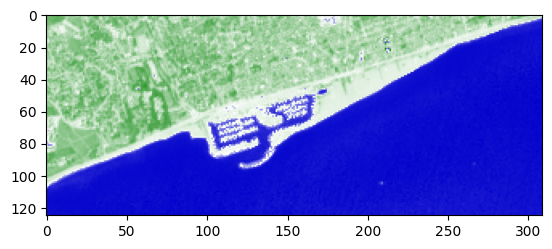

In [8]:
plt.imshow(all_bands_response[0][..., :3])

In [29]:
((((350 * 1000) / 20) / 512) / 2)

17.08984375